In [1]:
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


In [2]:
data = np.load('../data/imdb.npz')

In [3]:
data.files

['x_test', 'x_train', 'y_train', 'y_test']

In [4]:
x_train, labels_train = data['x_train'], data['y_train']
x_test, labels_test = data['x_test'], data['y_test']

In [5]:
x_train[0]

[23022,
 309,
 6,
 3,
 1069,
 209,
 9,
 2175,
 30,
 1,
 169,
 55,
 14,
 46,
 82,
 5869,
 41,
 393,
 110,
 138,
 14,
 5359,
 58,
 4477,
 150,
 8,
 1,
 5032,
 5948,
 482,
 69,
 5,
 261,
 12,
 23022,
 73935,
 2003,
 6,
 73,
 2436,
 5,
 632,
 71,
 6,
 5359,
 1,
 25279,
 5,
 2004,
 10471,
 1,
 5941,
 1534,
 34,
 67,
 64,
 205,
 140,
 65,
 1232,
 63526,
 21145,
 1,
 49265,
 4,
 1,
 223,
 901,
 29,
 3024,
 69,
 4,
 1,
 5863,
 10,
 694,
 2,
 65,
 1534,
 51,
 10,
 216,
 1,
 387,
 8,
 60,
 3,
 1472,
 3724,
 802,
 5,
 3521,
 177,
 1,
 393,
 10,
 1238,
 14030,
 30,
 309,
 3,
 353,
 344,
 2989,
 143,
 130,
 5,
 7804,
 28,
 4,
 126,
 5359,
 1472,
 2375,
 5,
 23022,
 309,
 10,
 532,
 12,
 108,
 1470,
 4,
 58,
 556,
 101,
 12,
 23022,
 309,
 6,
 227,
 4187,
 48,
 3,
 2237,
 12,
 9,
 215]

In [6]:
labels_train[0]

1

## labels
* 1 - positive review
* 0 - negative review

## How many words ?

In [7]:
max([max(sequence) for sequence in x_train])

88584

In [8]:
max([max(sequence) for sequence in x_test])

88581

In [9]:
# get the word index
word_index = imdb.get_word_index()

In [10]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [11]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])

In [12]:
decoded_review

"unapologetic himself a ? considering without is luke be ? find very this out also newman her face seen why this moreover time dub now to ? unpredictable sorely guess had and although it unapologetic classed'' behavior a well source and hero were a moreover ? periodic and captured capshaw ? 1950 proves by see only own go story likes clubfoot columbus ? excerpted the ? family write he mob had the ? lasting br knows ? story proves what br come ? let to even ? trailer progress editing and pleased cast ? face br surprisingly speakeasy be himself ? try home topic through end and boo have the ever moreover trailer relatively and unapologetic himself br self it films include the time killed any it unapologetic himself a bit goodness if ? assume it is must"

## Preparing the data

In [13]:
# vectorize: one-hot-encoding

def vectorize_sequences(sequences, dimension=88585):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [14]:
train = vectorize_sequences(x_train)

In [15]:
test = vectorize_sequences(x_test, dimension=88585)

In [16]:
train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [17]:
#vectorize labels
y_train  = np.asarray(labels_train).astype('float32')
y_test = np.asarray(labels_test).astype('float32')

## Network

In [18]:
from keras import models, layers

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(88585,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Validation set

In [21]:
x_val = train[:10000]
partial_train = train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training

In [22]:
history = model.fit(partial_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 54s - loss: 0.4253 - acc: 0.8247 - val_loss: 1.2865 - val_acc: 0.0089
Epoch 2/20
15000/15000 [==============================] - 49s - loss: 0.2503 - acc: 0.8897 - val_loss: 1.3279 - val_acc: 0.1646
Epoch 3/20
15000/15000 [==============================] - 18s - loss: 0.1545 - acc: 0.9512 - val_loss: 1.5371 - val_acc: 0.2401
Epoch 4/20
15000/15000 [==============================] - 9s - loss: 0.0998 - acc: 0.9737 - val_loss: 0.9848 - val_acc: 0.5405
Epoch 5/20
15000/15000 [==============================] - 9s - loss: 0.0652 - acc: 0.9844 - val_loss: 1.3327 - val_acc: 0.4840
Epoch 6/20
15000/15000 [==============================] - 9s - loss: 0.0425 - acc: 0.9909 - val_loss: 1.3178 - val_acc: 0.5488
Epoch 7/20
15000/15000 [==============================] - 9s - loss: 0.0268 - acc: 0.9948 - val_loss: 2.0471 - val_acc: 0.4329
Epoch 8/20
15000/15000 [==============================] - 

# History

In [23]:
history_dict = history.history

In [24]:
history_dict.keys()

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

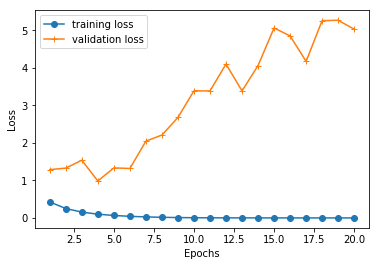

In [30]:
plt.plot(epochs, loss_values, '-o', label='training loss')
plt.plot(epochs, val_loss_values, '-+', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [31]:
# plotting accuracy
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

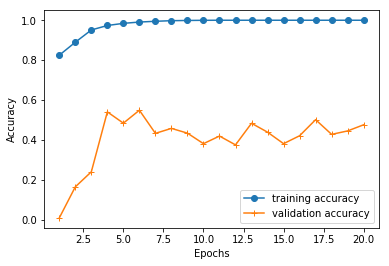

In [33]:
plt.plot(epochs, acc_values, '-o', label='training accuracy')
plt.plot(epochs, val_acc_values, '-+', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

## Overfitting
The bad performance on the validation set while the performance on the training set is good, is indicative of overfitting.

# Evaluate

In [34]:
model.fit(train, y_train, epochs=4, batch_size=512)
results = model.evaluate(test, y_test)

Epoch 1/4
25000/25000 [==============================] - 11s - loss: 0.5262 - acc: 0.9120    
Epoch 2/4
25000/25000 [==============================] - 11s - loss: 0.2544 - acc: 0.9500    
Epoch 3/4
25000/25000 [==============================] - 11s - loss: 0.1568 - acc: 0.9698    
Epoch 4/4
24992/25000 [============================>.] - ETA: 0s

In [35]:
results

[0.95640042989050966, 0.84460000000000002]

In [36]:
preds = model.predict(test)

In [38]:
preds[-10:]

array([[  1.35604648e-06],
       [  1.32201281e-08],
       [  1.71102419e-01],
       [  3.91746323e-11],
       [  3.15172855e-07],
       [  1.60372612e-04],
       [  9.75621581e-01],
       [  5.86766064e-01],
       [  1.77750334e-01],
       [  2.59446766e-04]], dtype=float32)